# Import Library

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib.ticker import PercentFormatter
# import os
# from fredapi import Fred

import marketobserve as mo

In [2]:
def options_chain(symbol):

    tk = yf.Ticker(symbol)
    # Expiration dates
    exps = tk.options
    # print(exps[1])
    # Get options for each expiration
    options = pd.DataFrame()
    options_list = []
    for e in exps:
        opt = tk.option_chain(e)
        calls_puts = pd.concat([opt.calls, opt.puts])
        calls_puts['expirationDate'] = e
        options_list.append(calls_puts)
    
    # Combine all options data
    options = pd.concat(options_list, ignore_index=True)

    # Bizarre error in yfinance that gives the wrong expiration date
    # Add 1 day to get the correct expiration date
    options['expirationDate'] = pd.to_datetime(options['expirationDate']) + dt.timedelta(days = 1)
    options['dte'] = (options['expirationDate'] - dt.datetime.today()).dt.days / 365
    
    # Boolean column if the option is a CALL
    options['CALL'] = options['contractSymbol'].str[4:].apply(
        lambda x: "C" in x)
    
    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['mark'] = (options['bid'] + options['ask']) / 2 # Calculate the midpoint of the bid-ask
    
    # Drop unnecessary and meaningless columns
    options = options.drop(columns = ['contractSize', 'currency', 'change', 'percentChange', 'lastTradeDate', 'lastPrice'])

    return options

In [3]:
# options_chain("^GSPC")
options_chain("^VIX")

,contractSymbol,strike,bid,ask,volume,openInterest,impliedVolatility,inTheMoney,expirationDate,dte,CALL,mark
0,VIX250318C00010000,10.0,10.75,10.95,99.0,4401.0,5.875003,True,2025-03-19,0.000000,True,10.850
1,VIX250318C00010500,10.5,10.25,10.45,10.0,31.0,5.531253,True,2025-03-19,0.000000,True,10.350
2,VIX250318C00011000,11.0,9.75,9.95,31.0,268.0,5.203128,True,2025-03-19,0.000000,True,9.850
3,VIX250318C00011500,11.5,9.30,9.40,2.0,145.0,4.890629,True,2025-03-19,0.000000,True,9.350
4,VIX250318C00012000,12.0,8.80,8.90,1585.0,3737.0,4.578129,True,2025-03-19,0.000000,True,8.850
...,...,...,...,...,...,...,...,...,...,...,...,...
1137,VIX251119P00030000,30.0,10.75,12.15,3.0,4.0,0.694095,True,2025-11-20,0.673973,False,11.450
1138,VIX251119P00033000,33.0,13.35,14.80,NaN,7.0,0.708987,True,2025-11-20,0.673973,False,14.075
1139,VIX251119P00034000,34.0,14.25,15.70,NaN,1.0,0.714847,True,2025-11-20,0.673973,False,14.975
1140,VIX251119P00035000,35.0,15.10,16.60,NaN,2.0,0.714358,True,2025-11-20,0.673973,False,15.850


# Return Distribution

In [13]:
# download data from yfinance
"""
If failed, try:
    pip uninstall yfinance
    pip install yfinance --upgrade --no-cache-dir
"""
data = yf.download('^VIX', start='1900-01-01',auto_adjust=False)[["Adj Close"]] # UVXY (1.5xL), UVIX (2xL), SVXY (1xS), SVIX (1xS), SVOL (), VIXM, VIXY, VXX, VXZ
data.columns = ['Close']


# download data from local file
# data = pd.read_excel("spx.xlsx",index_col="Date")
# data.columns = ["Close"]
# data = data.sort_index(ascending=True)

# # download data from xbbg
# from xbbg import blp
# data = blp.bdh("SPX Index","PX_LAST","1900-01-01") # HSI, NKY, SPX
# data.columns = ["Close"]
# data = data.sort_index(ascending=True)

[*********************100%***********************]  1 of 1 completed


In [14]:
data
# data.describe()

,Close
Date,
1990-01-02,17.240000
1990-01-03,18.190001
1990-01-04,19.219999
1990-01-05,20.110001
1990-01-08,20.260000
...,...
2025-03-11,26.920000
2025-03-12,24.230000
2025-03-13,24.660000


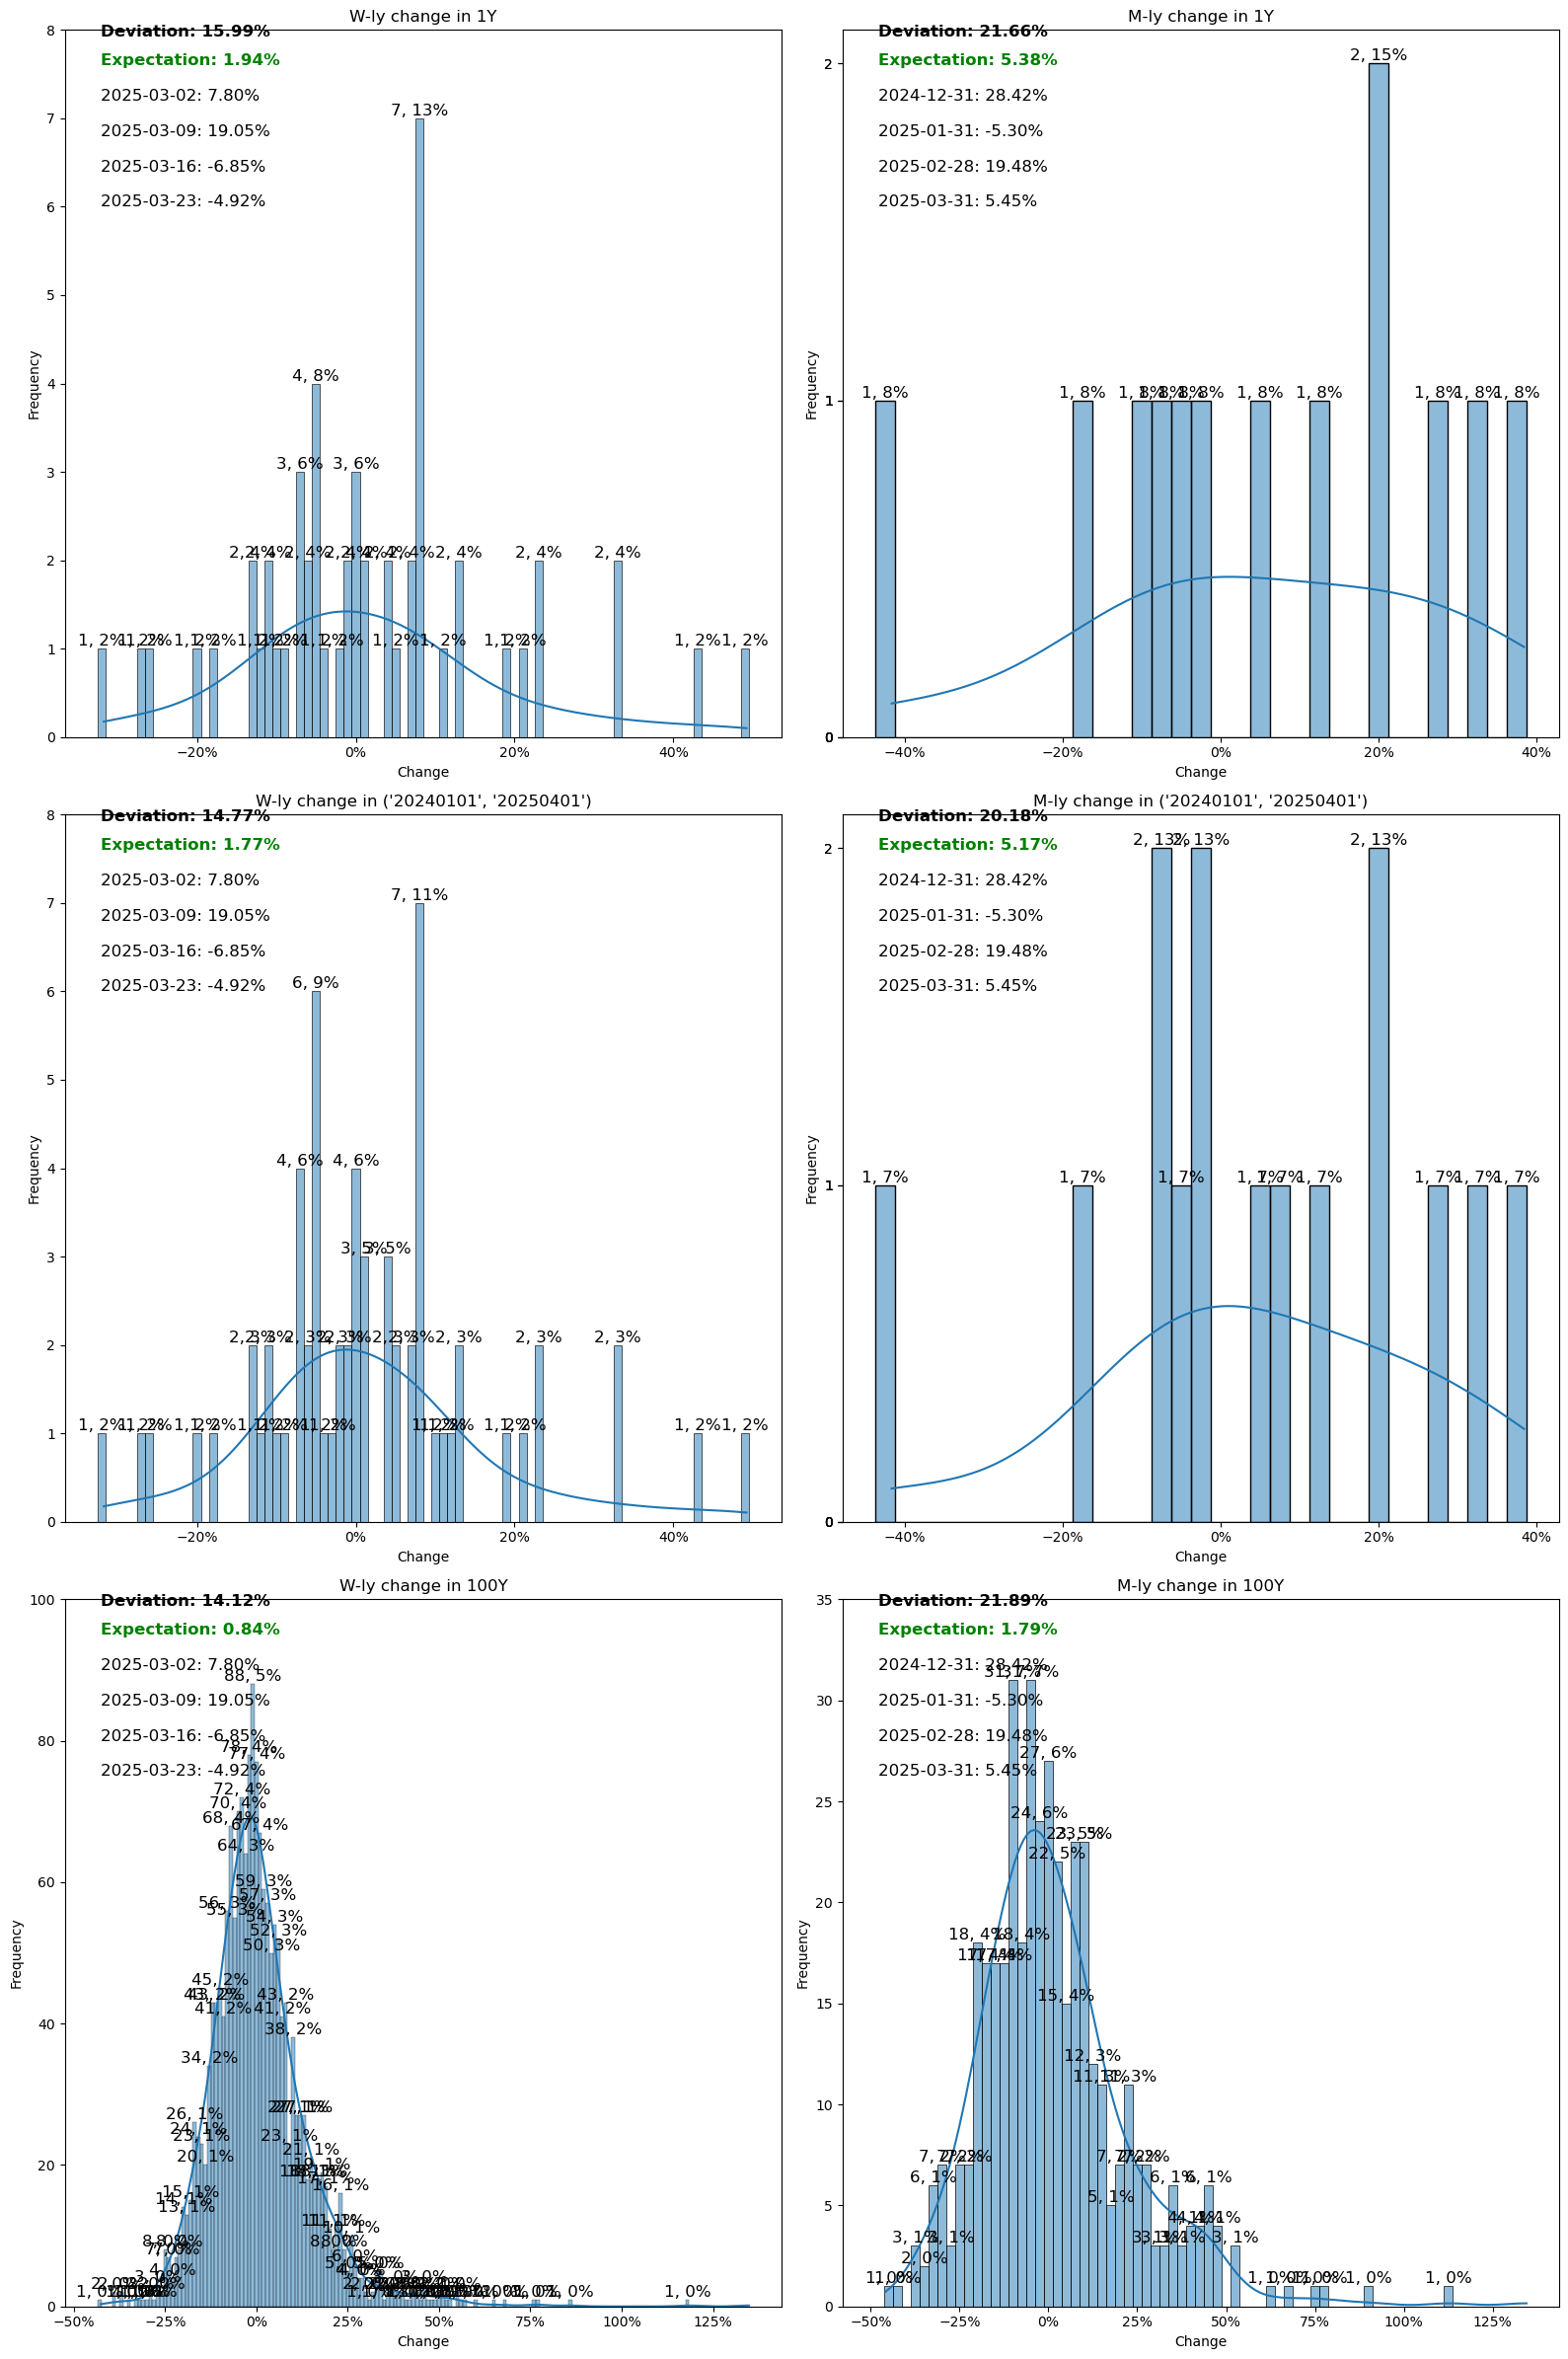

In [15]:
# test
mo.ChangeDistPlot(data, time_windows=['1Y', ('20240101', '20250401'), '100Y'], frequencies = ['W', 'M'])

In [16]:
# 生成示例数据

# 测试不同的 time_window 输入
data_test = data["Close"].copy()

time_window = ['100Y' ]
mo.BullBearPlot(data_test, time_window)